In [14]:
import pandas as pd
df = pd.read_csv('/Users/qasim/Documents/Analyzer Internship Project/Summer_IST495/data/Reviews.csv')
print(df.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [16]:
df = df[["Text"]]  # Keep only the 'Text' column
print(df.head(50))  # Show first 50 reviews for better output

                                                 Text
0   I have bought several of the Vitality canned d...
1   Product arrived labeled as Jumbo Salted Peanut...
2   This is a confection that has been around a fe...
3   If you are looking for the secret ingredient i...
4   Great taffy at a great price.  There was a wid...
5   I got a wild hair for taffy and ordered this f...
6   This saltwater taffy had great flavors and was...
7   This taffy is so good.  It is very soft and ch...
8   Right now I'm mostly just sprouting this so my...
9   This is a very healthy dog food. Good for thei...
10  I don't know if it's the cactus or the tequila...
11  One of my boys needed to lose some weight and ...
12  My cats have been happily eating Felidae Plati...
13  good flavor! these came securely packed... the...
14  The Strawberry Twizzlers are my guilty pleasur...
15  My daughter loves twizzlers and this shipment ...
16  I love eating them and they are good for watch...
17  I am very satisfied with

In [19]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter

# Ensure 'punkt' is available
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/qasim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords

# Setup 
nltk.download("stopwords")
tokenizer = TreebankWordTokenizer()
stop_words = set(stopwords.words("english"))

#  Loading the dataset 
df = df[["Text"]].dropna().head(50)   # use first 50 

# Combining all reviews into one string 
all_reviews = " ".join(df["Text"].astype(str)).lower()

#tokenize 
tokens = tokenizer.tokenize(all_reviews)

# keep only alphabetic tokens with len > 2 (this removes any irrelevant words)
filtered_tokens = [
    token for token in tokens
    if token.isalpha() and token not in stop_words and len(token) > 2
]

#  show top tokens
token_counts = Counter(filtered_tokens)
print("Most common meaningful tokens in Amazon reviews:")
print(token_counts.most_common(10))


Most common meaningful tokens in Amazon reviews:
[('oatmeal', 23), ('good', 21), ('mccann', 20), ('instant', 17), ('great', 13), ('sugar', 13), ('like', 11), ('love', 10), ('one', 10), ('pack', 10)]


[nltk_data] Downloading package stopwords to /Users/qasim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


I broke each review into individual word tokens using NLTK. I then cleaned the tokens to keep only the words that matter(removed words like the and and). Then counted how often each meaningful word appeared across all reviews. This gives us insight into what themes or items are most frequently talked about.






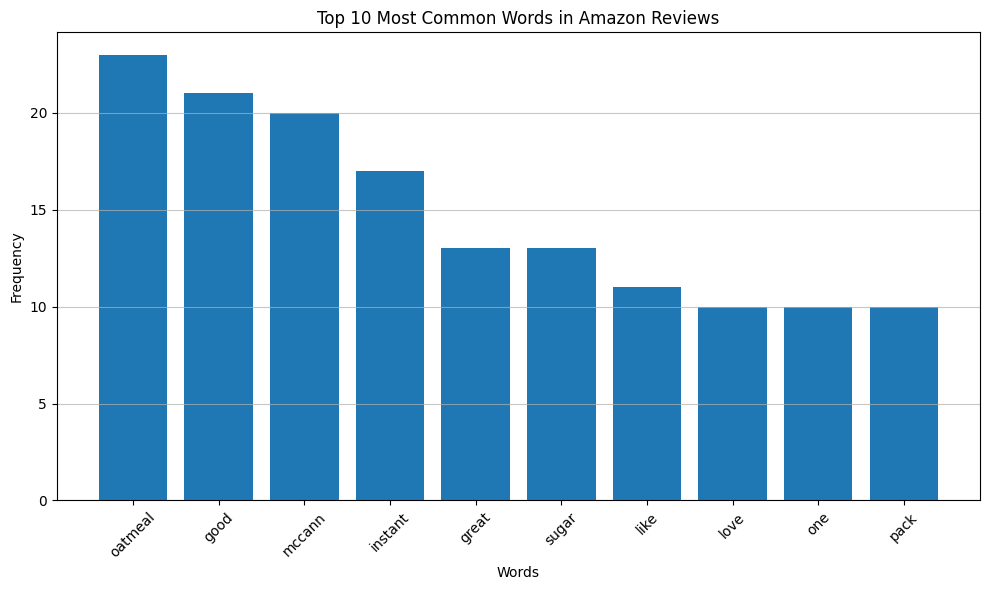

In [39]:
import matplotlib.pyplot as plt

# Get the top 10 most common tokens that i will be using for bar chart
top_tokens = token_counts.most_common(10)
words, counts = zip(*top_tokens)

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title('Top 10 Most Common Words in Amazon Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()
